In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

In [3]:
# Load data
df = pd.read_csv("Google_Stock_Price_Train.csv")  # replace with correct file


In [4]:
df = df[['Date', 'Close']]  # we focus on 'Close' price
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

In [5]:
# Normalize data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df[['Close']])

In [6]:
# Create sequences for RNN
def create_sequences(data, seq_length):
    X = []
    y = []
    for i in range(seq_length, len(data)):
        X.append(data[i-seq_length:i])
        y.append(data[i])
    return np.array(X), np.array(y)

seq_length = 60
X, y = create_sequences(scaled_data, seq_length)

In [7]:
# Split into train and test
split = int(0.8 * len(X))
X_train, y_train = X[:split], y[:split]
X_test, y_test = X[split:], y[split:]

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense

model = Sequential([
    SimpleRNN(50, activation='tanh', return_sequences=False, input_shape=(X_train.shape[1], 1)),
    Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()





Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 50)                2600      
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 2651 (10.36 KB)
Trainable params: 2651 (10.36 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [9]:
# Reshape input
X_train_rnn = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test_rnn = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Train
history = model.fit(X_train_rnn, y_train, epochs=20, validation_data=(X_test_rnn, y_test))


Epoch 1/20

30/30 [==============================] - 2s 17ms/step - loss: 0.0160 - val_loss: 0.0022
Epoch 2/20
30/30 [==============================] - 0s 9ms/step - loss: 0.0039 - val_loss: 6.6495e-04
Epoch 3/20
30/30 [==============================] - 0s 10ms/step - loss: 0.0031 - val_loss: 5.1345e-04
Epoch 4/20
30/30 [==============================] - 0s 9ms/step - loss: 0.0025 - val_loss: 8.6391e-04
Epoch 5/20
30/30 [==============================] - 0s 10ms/step - loss: 0.0022 - val_loss: 6.4058e-04
Epoch 6/20
30/30 [==============================] - 0s 9ms/step - loss: 0.0019 - val_loss: 4.3681e-04
Epoch 7/20
30/30 [==============================] - 0s 9ms/step - loss: 0.0018 - val_loss: 3.6833e-04
Epoch 8/20
30/30 [==============================] - 0s 9ms/step - loss: 0.0017 - val_loss: 0.0010
Epoch 9/20
30/30 [==============================] - 0s 9ms/step - loss: 0.0016 - val_loss: 3.0144e-04
Epoch 10/20
30/30 [==============================] - 0s 9ms/step - loss: 0.0015 - val_

In [10]:
# Predict
predicted = model.predict(X_test_rnn)
predicted_prices = scaler.inverse_transform(predicted)
real_prices = scaler.inverse_transform(y_test.reshape(-1, 1))

8/8 [==============================] - 0s 4ms/step


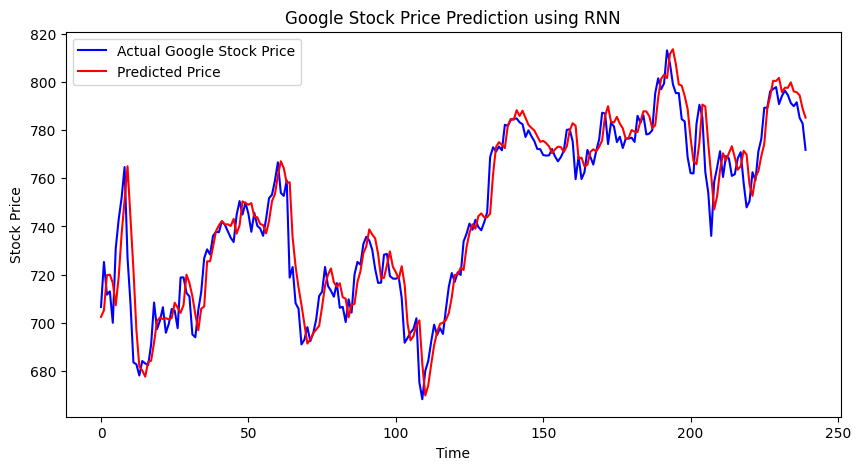

In [11]:
# Plot
plt.figure(figsize=(10,5))
plt.plot(real_prices, color='blue', label='Actual Google Stock Price')
plt.plot(predicted_prices, color='red', label='Predicted Price')
plt.title('Google Stock Price Prediction using RNN')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()